<a href="https://colab.research.google.com/github/FeedingDejaj/MAT422/blob/main/3_4_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.4 Logistic Regression

By Abdula Alkhafaji with help from Generative AI.

**Logistic Regression** is a statistical method used for binary classification problems. It models the probability that a given input belongs to a particular class. Unlike linear regression, logistic regression uses a sigmoid function to map predicted values to probabilities.

### Key Concepts:
- Logistic regression models the relationship between a dependent variable (binary) and one or more independent variables.
- The output is interpreted as a probability, typically thresholded at 0.5 for classification.



## Logistic Regression Equation

Logistic regression predicts the probability \(P(y=1|X)\), where \(y\) is the binary target variable and \(X\) is the input. The model assumes:

\[
P(y=1|X) = \sigma(X \beta) = \frac{1}{1 + e^{-X \beta}},
\]
where:
- \(\sigma(z)\): Sigmoid function, mapping any real number to \([0, 1]\).
- \(X \beta\): Linear combination of inputs and their coefficients.

The decision boundary is typically set at 0.5, meaning:
\[
y = \begin{cases}
1 & \text{if } P(y=1|X) \geq 0.5, \
0 & \text{otherwise.}
\end{cases}
\]

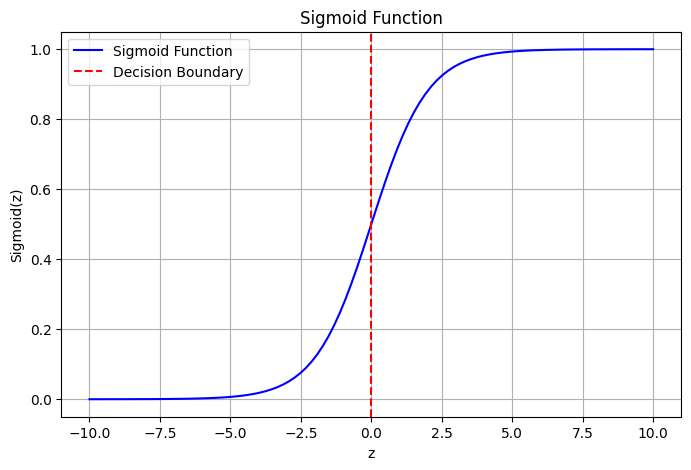

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate values
z = np.linspace(-10, 10, 100)
y = sigmoid(z)

# Plot sigmoid function
plt.figure(figsize=(8, 5))
plt.plot(z, y, label='Sigmoid Function', color='blue')
plt.axvline(0, color='red', linestyle='--', label='Decision Boundary')
plt.title('Sigmoid Function')
plt.xlabel('z')
plt.ylabel('Sigmoid(z)')
plt.legend()
plt.grid()
plt.show()

## Logistic Regression Implementation

Let's demonstrate logistic regression using a dataset with two classes. We will use Python's **scikit-learn** library for simplicity.

Accuracy: 0.85


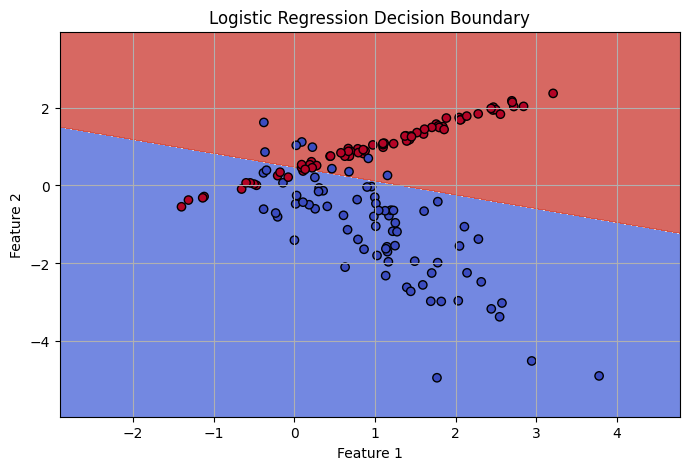

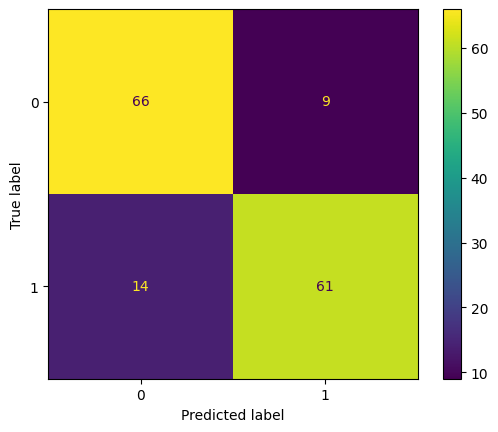

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


X, y = make_classification(n_samples=500, n_features=2, n_informative=2,                            n_redundant=0, random_state=42, n_clusters_per_class=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

plt.figure(figsize=(8, 5))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap='coolwarm')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.show()


ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()